In [1]:
import pandas as pd

In [2]:
data =  pd.read_csv("/Users/renato/Downloads/data_withsumm.csv")

In [3]:
data.head(2)

,Unnamed: 0,link,pdate,title,author,text,time,article_length,urls,pre_process_text,pre_processed_data,5_step_classifier,lemmatize,keywords,pred_class,text_summ
0,0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Ron DeSantis Debates His Grievances,['David Frum'],"For Gavin Newsom, the TV exposure had a clear ...",15:00:00+00:00,1240,www.theatlantic.com,For Gavin Newsom the TV exposure had a clear ...,"for gavin newsom, the tv exposure had a clear ...",-2.0,"for gavin newsom, the tv exposure had a clear ...","{'desantis': 0.576, 'newsom': 0.526, 'fox': 0....",left,Ron DeSantis and Gavin Newsom debated for Fox...
1,1,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Inflation Is Your Fault,['Annie Lowrey'],"You would think, with prices as high as they a...",12:41:00+00:00,918,www.theatlantic.com,You would think with prices as high as they a...,"you would think, with prices as high as they a...",-2.0,"you would think, with price a high a they are,...","{'consumer': 0.313, 'price': 0.297, 'spending'...",left,Frida Ghitis: Consumer spending rose 0.2 perc...


In [4]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")
model = TFAutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-cnn-12-6", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForConditionalGeneration: ['model.decoder.embed_tokens.weight', 'model.encoder.embed_tokens.weight']
- This IS expected if you are initializing TFBartForConditionalGeneration from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForConditionalGeneration from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForConditionalGeneration for predictions without further training.


In [5]:
def sshleifer_summarize(text):
    # Encode the text
    input_ids = tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    # Generate summary for the text
    output = model.generate(input_ids, max_length=100, num_return_sequences=1, early_stopping=True)
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    return decoded_output

In [6]:
from tqdm import tqdm
import pandas as pd

In [7]:
for i in tqdm(range(1160, 1815), desc='loading', unit='text'):
    data["text_summ"][i] = sshleifer_summarize(data["text"][i])
print("finish !")


loading:   0%|                                        | 0/655 [00:00<?, ?text/s]/var/folders/y1/_5hqz1554_96pz014vwgdrk40000gn/T/ipykernel_26931/1937902153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text_summ"][i] = sshleifer_summarize(data["text"][i])
loading:   0%|                              | 1/655 [00:22<4:00:59, 22.11s/text]/var/folders/y1/_5hqz1554_96pz014vwgdrk40000gn/T/ipykernel_26931/1937902153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text_summ"][i] = sshleifer_summarize(data["text"][i])
loading:   0%|                              | 2/655 [00:43<3:54:22, 21.53s/text]/var/folde

finish !


In [35]:
#data["text_summ"][1160]

" ESPN's college football rankings show is the single most worthless television show in history. John Sutter: Top four teams in the second-to-last rankings of the season were Georgia, Michigan, Washington and Florida State. The next four teams — Oregon, Ohio State, Texas and Alabama — are 11-1. Only Ohio State will not play this weekend in conference championship games this weekend."

In [8]:
data 

,Unnamed: 0,link,pdate,title,author,text,time,article_length,urls,pre_process_text,pre_processed_data,5_step_classifier,lemmatize,keywords,pred_class,text_summ
0,0,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Ron DeSantis Debates His Grievances,['David Frum'],"For Gavin Newsom, the TV exposure had a clear ...",15:00:00+00:00,1240,www.theatlantic.com,For Gavin Newsom the TV exposure had a clear ...,"for gavin newsom, the tv exposure had a clear ...",-2.0,"for gavin newsom, the tv exposure had a clear ...","{'desantis': 0.576, 'newsom': 0.526, 'fox': 0....",left,Ron DeSantis and Gavin Newsom debated for Fox...
1,1,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Inflation Is Your Fault,['Annie Lowrey'],"You would think, with prices as high as they a...",12:41:00+00:00,918,www.theatlantic.com,You would think with prices as high as they a...,"you would think, with prices as high as they a...",-2.0,"you would think, with price a high a they are,...","{'consumer': 0.313, 'price': 0.297, 'spending'...",left,Frida Ghitis: Consumer spending rose 0.2 perc...
2,2,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,What Kissinger Didn’t Understand,['George Packer'],Henry Kissinger spent half a century pursuing ...,12:31:00+00:00,1170,www.theatlantic.com,Henry Kissinger spent half a century pursuing ...,henry kissinger spent half a century pursuing ...,-2.0,henry kissinger spent half a century pursuing ...,"{'kissinger': 0.672, 'wa': 0.21, 'human': 0.12...",left,Frida Ghitis: Kissinger spent half a century ...
3,3,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,What If Americans Are Happy at Work?,['Derek Thompson'],"This is Work in Progress, a newsletter about w...",11:00:00+00:00,1193,www.theatlantic.com,This is Work in Progress a newsletter about w...,"this is work in progress, a newsletter about w...",-2.0,"this is work in progress, a newsletter about w...","{'worker': 0.326, 'work': 0.259, 'journal': 0....",left,The Wall Street Journal recently published a ...
4,4,https://www.theatlantic.com/ideas/archive/2023...,2023-12-01,Meet the Super SPAC,['Elliot Ackerman'],One of the greatest obstacles that an independ...,11:00:00+00:00,1110,www.theatlantic.com,One of the greatest obstacles that an independ...,one of the greatest obstacles that an independ...,-2.0,one of the greatest obstacle that an independe...,"{'ballot': 0.412, 'candidate': 0.227, 'contrib...",left,Julian Zelizer: Winning ballot access across ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,4425,https://www.theepochtimes.com/sports/no-3-wash...,NaN,Katie Ledecky Loses a Home 400-Meter Freestyle...,[],"GREENSBORO, N.C. —For the first time in 11 yea...",NaN,203,www.theepochtimes.com,GREENSBORO N C —For the first time in years...,"greensboro, n.c. —for the first time in 11 yea...",1.0,"greensboro, n.c. —for the first time in 11 yea...","{'400': 0.375, 'free': 0.249, 'seconds': 0.243...",leans right,NaN
4426,4426,https://www.theepochtimes.com/sports/no-3-wash...,NaN,Tiger Woods Putts Into a Bunker and Loses Grou...,[],"NASSAU, Bahamas—Tiger Woods opened with four b...",NaN,653,www.theepochtimes.com,NASSAU Bahamas—Tiger Woods opened with four b...,"nassau, bahamas—tiger woods opened with four b...",1.0,"nassau, bahamas—tiger wood opened with four bi...","{'shot': 0.367, 'wood': 0.341, 'hole': 0.341, ...",leans right,NaN
4427,4427,https://www.theepochtimes.com/sports/tiger-woo...,NaN,Former Colorado Players Were Told They Weren't...,[],"COUNCIL BLUFFS, Iowa—Luke Eckardt recalled the...",NaN,1764,www.theepochtimes.com,COUNCIL BLUFFS Iowa—Luke Eckardt recalled the...,"council bluffs, iowa—luke eckardt recalled the...",1.0,"council bluffs, iowa—luke eckardt recalled the...","{'player': 0.367, 'colorado': 0.323, 'coach': ...",leans right,NaN
4428,4428,https://www.theepochtimes.com/sports/former-co...,NaN,USC's Bronny James Cleared by Doctors for Retu...,[],LOS ANGELES—Bronny James has been cleared by d...,N

In [37]:
#data.to_csv('data_withsumm.csv', index=False)

[nltk_data] Downloading package wordnet to /Users/renato/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


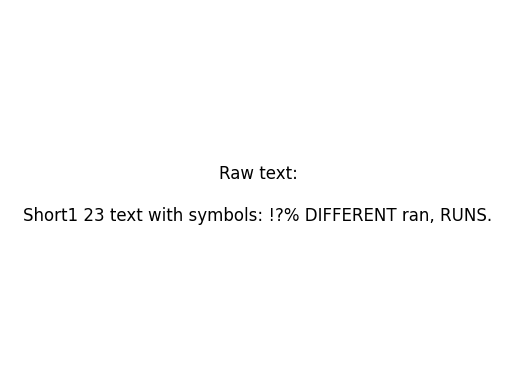

In [26]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data for lemmatization
nltk.download('wordnet')

# Raw data
raw_text = "Short1 23 text with symbols: !?% DIFFERENT ran, RUNS."

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Data cleaning function with lemmatization
def clean_data(text):
    # Lowercasing to remove uppercase
    text = text.lower()

    # Tokenization
    tokens = text.split()

    # Removing special characters
    tokens_clean = ["".join(e for e in token if e.isalnum()) for token in tokens]

    # Lemmatization
    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens_clean]

    # Removing stopwords (example)
    stopwords = ["with", "symbols", "like"]
    tokens_final = [token for token in tokens_lemmatized if token not in stopwords]

    return tokens, tokens_final

# Initialize the plot
fig, ax = plt.subplots()
ax.axis('off')  # Turn off axis
text = ax.text(0.5, 0.5, "", ha='center', va='center', fontsize=12)

# Data cleaning animation
def update(frame):
    if frame == 0:
        text.set_text("Raw text:\n\n" + raw_text)
    elif frame == 1:
        tokens, _ = clean_data(raw_text)
        text.set_text("Tokenization:\n\n" + str(tokens))
    elif frame == 2:
        _, tokens_clean = clean_data(raw_text)
        text.set_text("Lemmatization:\n\n" + str(tokens_clean))
    else:
        text.set_text("Cleaned data ready for NLP!")

ani = animation.FuncAnimation(fig, update, frames=4, interval=2000, repeat=False)

# Display the animation
plt.rcParams['animation.embed_limit'] = 2**128  # Increase animation embed limit for Jupyter Notebook
HTML(ani.to_jshtml())
